<h2 style="text-align: center;">Forest Cover Type Prediction - Kaggle</h2>

Dataset descriptions: https://www.kaggle.com/competitions/forest-cover-type-prediction/data

**The different forest cover types:** \
1 - Spruce/Fir \
2 - Lodgepole Pine \
3 - Ponderosa Pine \
4 - Cottonwood/Willow \
5 - Aspen \
6 - Douglas-fir \
7 - Krummholz

In [48]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [2]:
path = os.getcwd()   # current working directory
current_folder = "data"
print(os.getcwd())
for dirname, _, filenames in os.walk(os.path.join(path,current_folder)):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Asus\Desktop\Coding-Projects\Forest_cover_type_prediction
C:\Users\Asus\Desktop\Coding-Projects\Forest_cover_type_prediction\data\new_test_data.csv
C:\Users\Asus\Desktop\Coding-Projects\Forest_cover_type_prediction\data\new_train_data.csv
C:\Users\Asus\Desktop\Coding-Projects\Forest_cover_type_prediction\data\sampleSubmission.csv
C:\Users\Asus\Desktop\Coding-Projects\Forest_cover_type_prediction\data\test.csv
C:\Users\Asus\Desktop\Coding-Projects\Forest_cover_type_prediction\data\train.csv


In [3]:
train_data = pd.read_csv(os.path.join(path,"data/new_train_data.csv"))
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,29,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,29,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,12,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,30,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,29,5


In [4]:
test_data = pd.read_csv(os.path.join(path,"data/new_test_data.csv"))
test_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type
0,15121,2680,354,14,0,0,2684,196,214,156,6645,1,29
1,15122,2683,0,13,0,0,2654,201,216,152,6675,1,29
2,15123,2713,16,15,0,0,2980,206,208,137,6344,1,29
3,15124,2709,24,17,0,0,2950,208,201,125,6374,1,29
4,15125,2706,29,19,0,0,2920,210,195,115,6404,1,29


In [5]:
train_data.info()   # there are no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area                     15120 non-null  int64
 12  Soil

In [6]:
test_data.info()  # there are no missing data as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Id                                  565892 non-null  int64
 1   Elevation                           565892 non-null  int64
 2   Aspect                              565892 non-null  int64
 3   Slope                               565892 non-null  int64
 4   Horizontal_Distance_To_Hydrology    565892 non-null  int64
 5   Vertical_Distance_To_Hydrology      565892 non-null  int64
 6   Horizontal_Distance_To_Roadways     565892 non-null  int64
 7   Hillshade_9am                       565892 non-null  int64
 8   Hillshade_Noon                      565892 non-null  int64
 9   Hillshade_3pm                       565892 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  565892 non-null  int64
 11  Wilderness_Area                     565892 non-null 

In [7]:
train_data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,2.800397,19.171362,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,1.119832,12.626960,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,2.000000,10.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,3.000000,17.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,4.000000,30.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,4.000000,40.000000,7.000000


**Exploring the data**

In [8]:
test_data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type
count,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000
mean,298066.500000,2964.977407,155.629558,14.039635,270.556622,46.294408,2367.143116,212.131133,223.435026,142.726951,1992.826227,2.096135,24.501143
std,163359.093603,273.157030,111.962120,7.450155,212.500153,58.209469,1561.482002,26.661063,19.668053,38.030094,1327.396895,1.053580,9.347613
min,15121.000000,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,156593.750000,2818.000000,58.000000,9.000000,108.000000,7.000000,1116.000000,198.000000,213.000000,119.000000,1034.000000,1.000000,20.000000
50%,298066.500000,2999.000000,127.000000,13.000000,228.000000,29.000000,2018.000000,218.000000,226.000000,143.000000,1723.000000,2.000000,29.000000
75%,439539.250000,3164.000000,260.000000,18.000000,390.000000,69.000000,3349.000000,231.000000,237.000000,168.000000,2561.000000,3.000000,31.000000
max,581012.000000,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,4.000000,40.000000


In [9]:
df = train_data["Cover_Type"].value_counts().to_frame()
df.sort_index()

,Cover_Type
1,2160
2,2160
3,2160
4,2160
5,2160
6,2160
7,2160


**Visualizing the data**

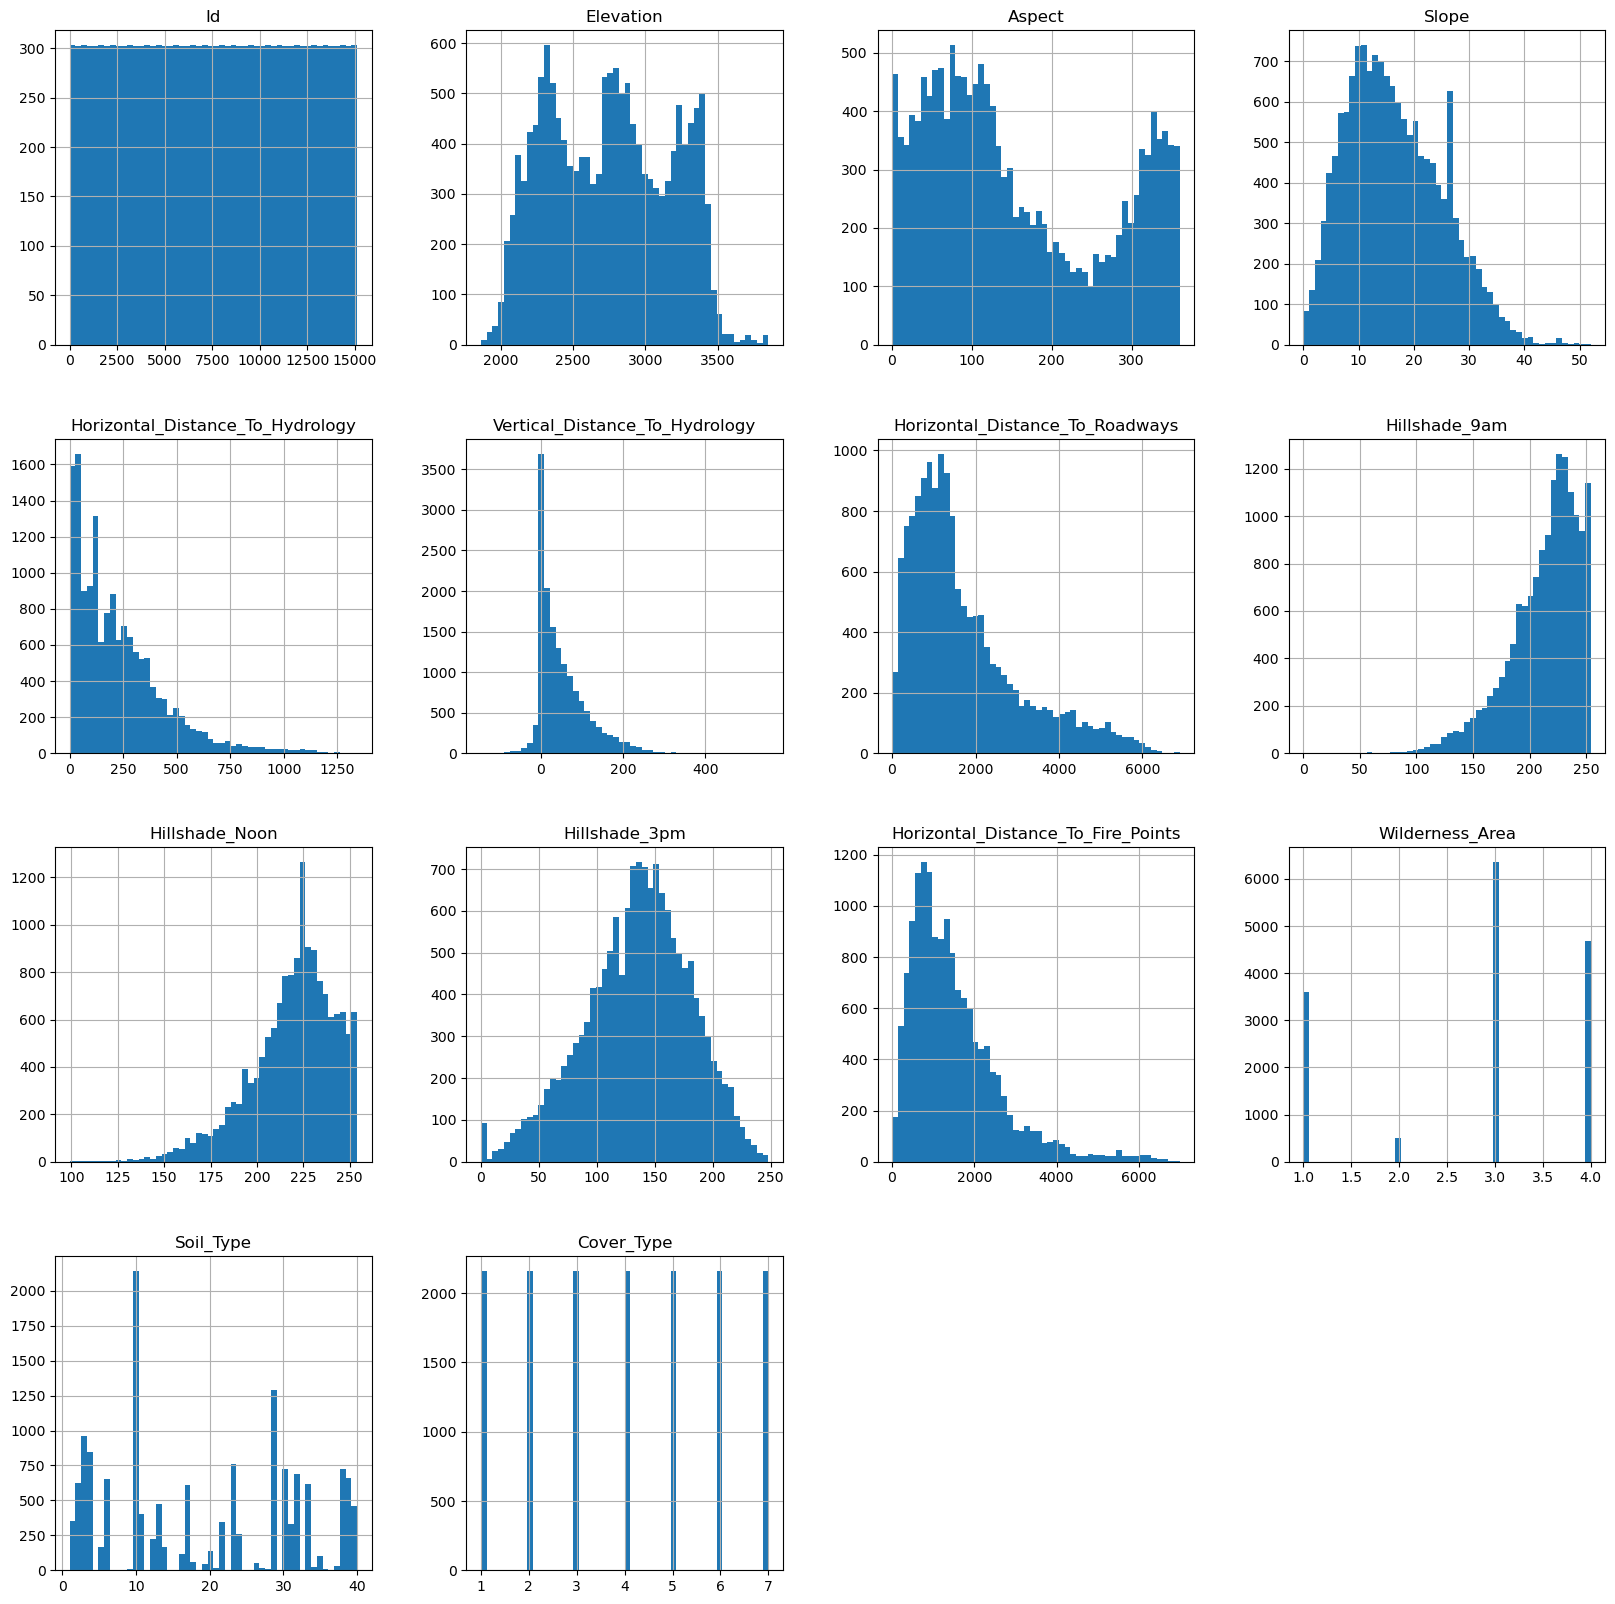

In [10]:
%matplotlib inline 

train_data.hist(bins=50, figsize=(20,20))
plt.show()

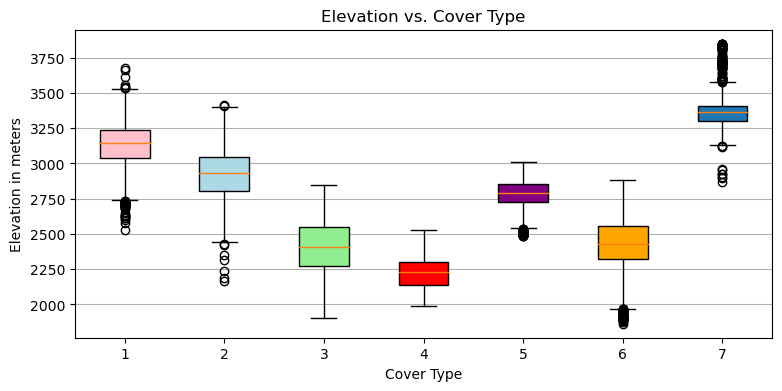

In [11]:
# Elevation vs. Cover Type 
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html
# The lower whisker: Q1 - whis*IQR, where whis=1.5 (default) and IQR = Q3 - Q1 
# The upper whisker: Q3 + whis*IQR
# The data which are above or below are considered outliers and are plotted individually

for i in range(1,8):  # creating variables type1 to type7 and x1 to x7
    exec(f'type{i} = train_data[train_data.Cover_Type == i]["Elevation"]') 
    exec(f'x{i} = len(type{i})*[{i}]')

all_data = [globals()["type%d" % i] for i in range(1,8)]  
# equivalent to: all_data = [type1, type2, type3, type4, type5, type6, type7]

labels = [str(i) for i in range(1,8)]
fig, ax1 = plt.subplots(figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True, 
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Elevation vs. Cover Type')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'red', 'purple', 'orange']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

ax1.yaxis.grid(True)
ax1.set_xlabel('Cover Type')
ax1.set_ylabel('Elevation in meters')

plt.show()

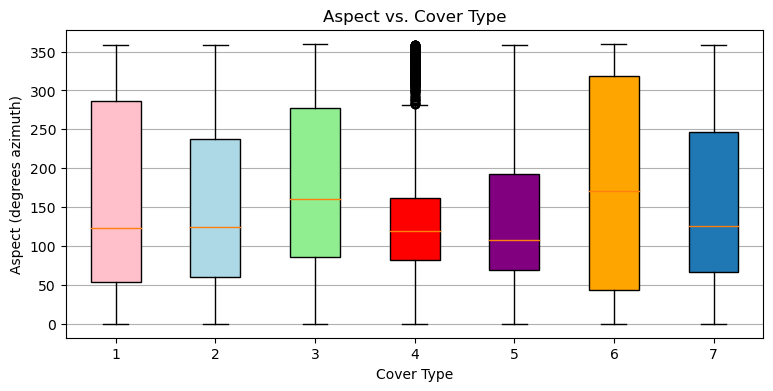

In [12]:
# Aspect vs. Cover Type
for i in range(1,8):  # creating variables aspect1 to aspect7 and length1 to length7
    exec(f'aspect{i} = train_data[train_data.Cover_Type == i]["Aspect"]')
    exec(f'length{i} = len(type{i})*[{i}]')

all_data = [globals()["aspect%d" % i] for i in range(1,8)] 
labels = [str(i) for i in range(1,8)]
fig, ax1 = plt.subplots(figsize=(9, 4))

bplot1 = ax1.boxplot(all_data,
                     vert=True, 
                     patch_artist=True,  
                     labels=labels) 
ax1.set_title('Aspect vs. Cover Type')

colors = ['pink', 'lightblue', 'lightgreen', 'red', 'purple', 'orange']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

ax1.yaxis.grid(True)
ax1.set_xlabel('Cover Type')
ax1.set_ylabel('Aspect (degrees azimuth)')

plt.show()

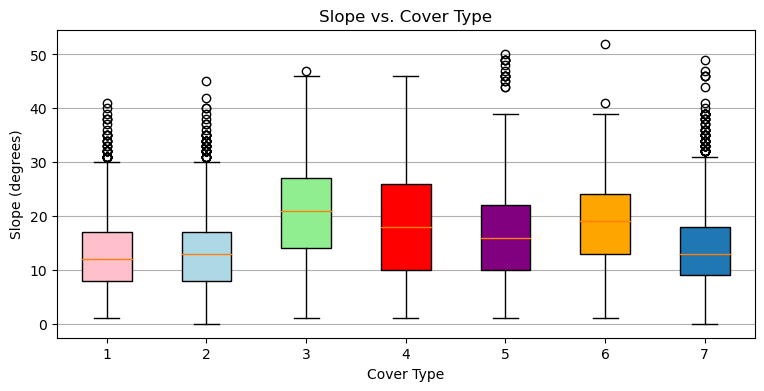

In [13]:
# Slope vs. Cover Type
for i in range(1,8):  # creating variables slope1 to slope7 and len1 to len7
    exec(f'slope{i} = train_data[train_data.Cover_Type == i]["Slope"]')
    exec(f'len{i} = len(type{i})*[{i}]')
    
all_data = [globals()["slope%d" % i] for i in range(1,8)] 
labels = [str(i) for i in range(1,8)]
fig, ax1 = plt.subplots(figsize=(9, 4))

bplot1 = ax1.boxplot(all_data,
                     vert=True, 
                     patch_artist=True, 
                     labels=labels)  
ax1.set_title('Slope vs. Cover Type')

colors = ['pink', 'lightblue', 'lightgreen', 'red', 'purple', 'orange']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

ax1.yaxis.grid(True)
ax1.set_xlabel('Cover Type')
ax1.set_ylabel('Slope (degrees)')

plt.show()

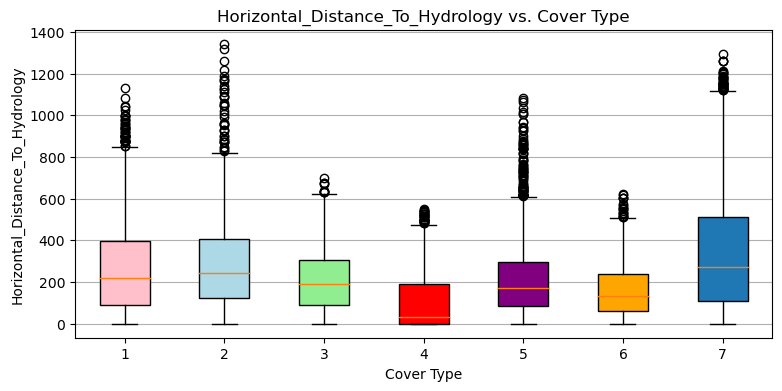

In [14]:
# Horizontal_Distance_To_Hydrology vs. Cover Type
for i in range(1,8):
    exec(f'h_distance_hydro{i} = train_data[train_data.Cover_Type == i]["Horizontal_Distance_To_Hydrology"]')

all_data = [globals()["h_distance_hydro%d" % i] for i in range(1,8)] 
labels = [str(i) for i in range(1,8)]
fig, ax1 = plt.subplots(figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True, 
                     patch_artist=True, 
                     labels=labels) 
ax1.set_title('Horizontal_Distance_To_Hydrology vs. Cover Type')

colors = ['pink', 'lightblue', 'lightgreen', 'red', 'purple', 'orange']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

ax1.yaxis.grid(True)
ax1.set_xlabel('Cover Type')
ax1.set_ylabel('Horizontal_Distance_To_Hydrology')

plt.show()

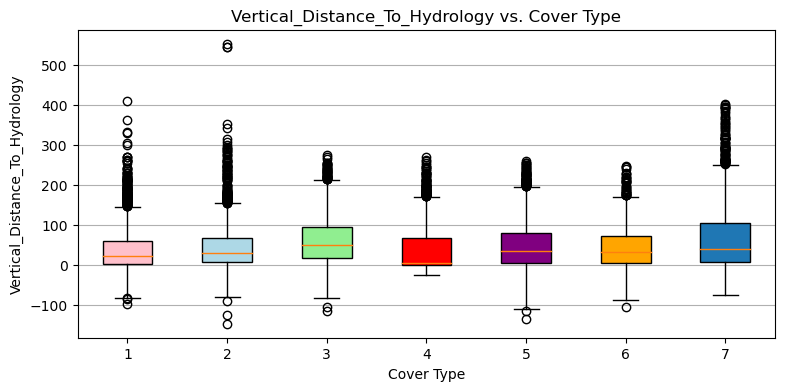

In [15]:
# Vertical_Distance_To_Hydrology vs. Cover Type
for i in range(1,8): 
    exec(f'v_distance_hydro{i} = train_data[train_data.Cover_Type == i]["Vertical_Distance_To_Hydrology"]')

all_data = [globals()["v_distance_hydro%d" % i] for i in range(1,8)] 
labels = [str(i) for i in range(1,8)]
fig, ax1 = plt.subplots(figsize=(9, 4))

bplot1 = ax1.boxplot(all_data,
                     vert=True, 
                     patch_artist=True, 
                     labels=labels)  
ax1.set_title('Vertical_Distance_To_Hydrology vs. Cover Type')

colors = ['pink', 'lightblue', 'lightgreen', 'red', 'purple', 'orange']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

ax1.yaxis.grid(True)
ax1.set_xlabel('Cover Type')
ax1.set_ylabel('Vertical_Distance_To_Hydrology')

plt.show()

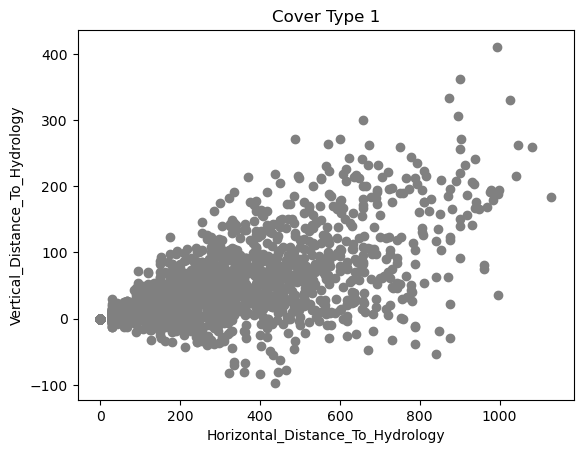

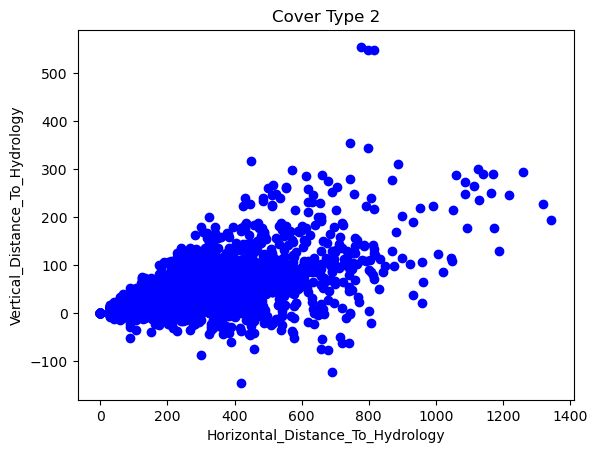

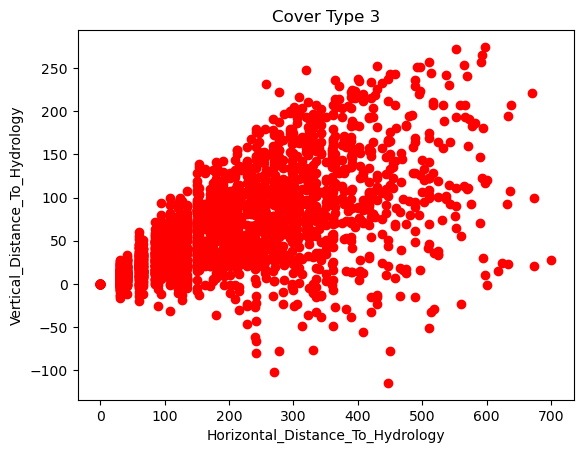

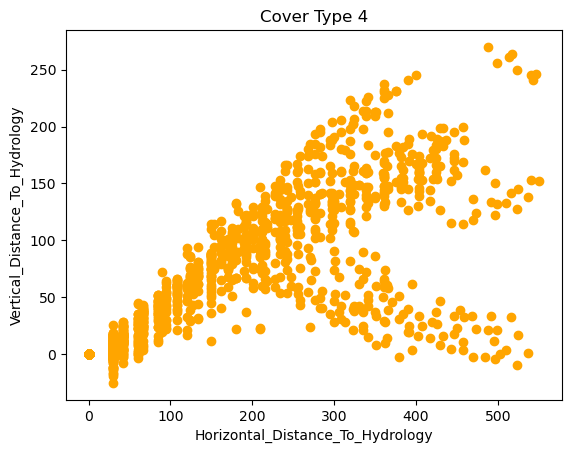

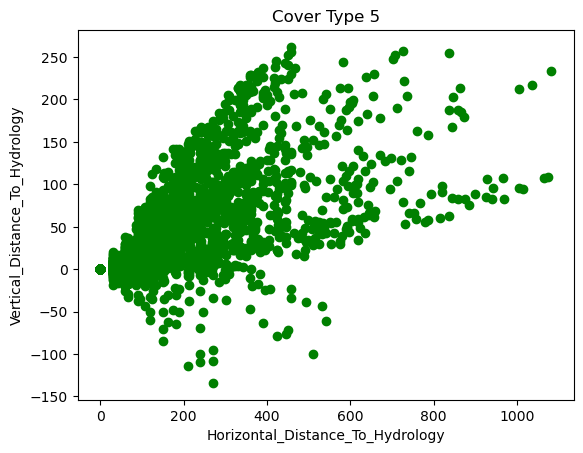

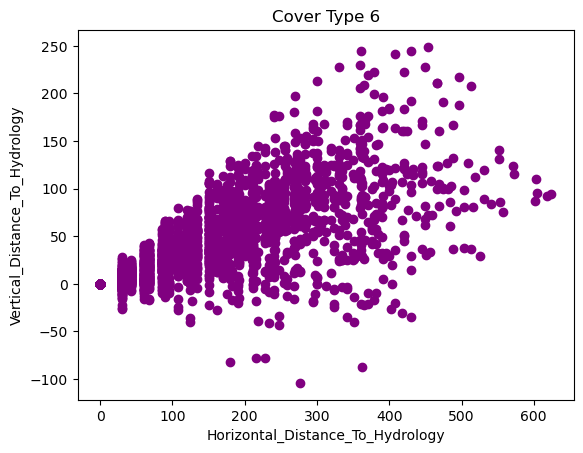

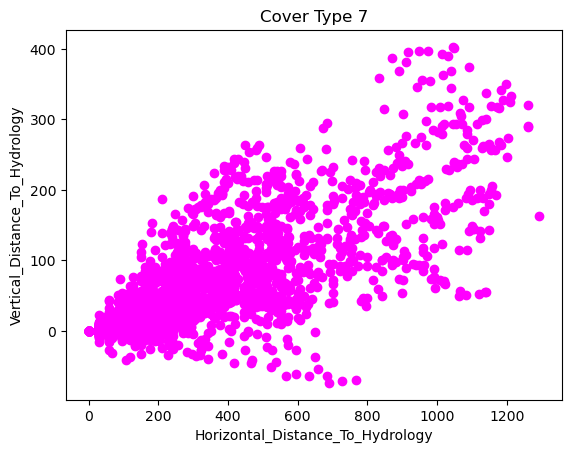

In [16]:
# Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology vs. Cover Type 
color =  ['grey', 'blue', 'red', 'orange', 'green', 'purple', 'magenta']

for i in range(1,8):
    exec(f'x{i} = train_data["Horizontal_Distance_To_Hydrology"][train_data.Cover_Type == {i}]')
    exec(f'y{i} = train_data["Vertical_Distance_To_Hydrology"][train_data.Cover_Type == {i}]')

for i in range(1,8):
    plt.figure()
    exec(f'plt.title("Cover Type {i}")')
    plt.xlabel("Horizontal_Distance_To_Hydrology")
    plt.ylabel("Vertical_Distance_To_Hydrology")
    exec(f'plt.scatter(x{i},y{i}, c=color[{i-1}])')

plt.show()

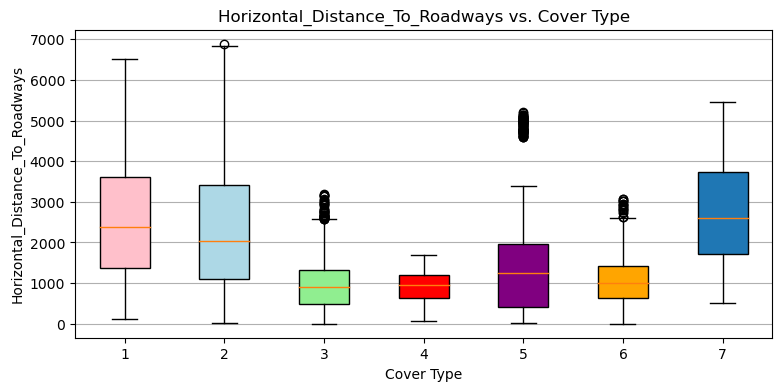

In [17]:
# Horizontal_Distance_To_Roadways vs. Cover Type

for i in range(1,8): 
    exec(f'h_distance_road{i} = train_data[train_data.Cover_Type == i]["Horizontal_Distance_To_Roadways"]')

all_data = [globals()["h_distance_road%d" % i] for i in range(1,8)] 
labels = [str(i) for i in range(1,8)]
fig, ax1 = plt.subplots(figsize=(9, 4))

bplot1 = ax1.boxplot(all_data,
                     vert=True, 
                     patch_artist=True, 
                     labels=labels)
ax1.set_title('Horizontal_Distance_To_Roadways vs. Cover Type')

colors = ['pink', 'lightblue', 'lightgreen', 'red', 'purple', 'orange']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

ax1.yaxis.grid(True)
ax1.set_xlabel('Cover Type')
ax1.set_ylabel('Horizontal_Distance_To_Roadways')

plt.show()

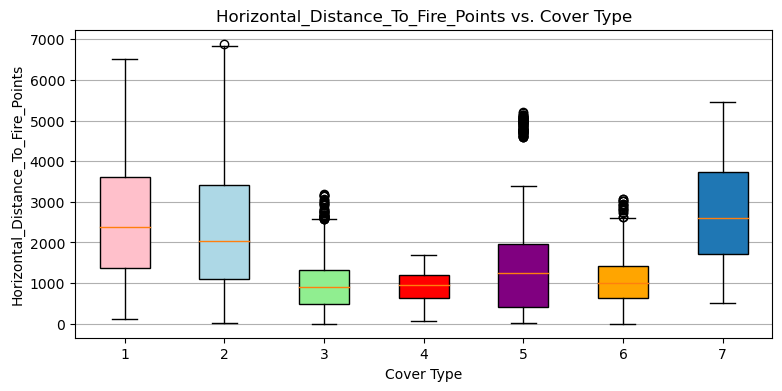

In [18]:
# Horizontal_Distance_To_Fire_Points vs. Cover Type

for i in range(1,8): 
    exec(f'h_distance_fire{i} = train_data[train_data.Cover_Type == i]["Horizontal_Distance_To_Fire_Points"]')

all_data = [globals()["h_distance_road%d" % i] for i in range(1,8)] 
labels = [str(i) for i in range(1,8)]
fig, ax1 = plt.subplots(figsize=(9, 4))

bplot1 = ax1.boxplot(all_data,
                     vert=True, 
                     patch_artist=True,  
                     labels=labels) 
ax1.set_title('Horizontal_Distance_To_Fire_Points vs. Cover Type')

colors = ['pink', 'lightblue', 'lightgreen', 'red', 'purple', 'orange']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

ax1.yaxis.grid(True)
ax1.set_xlabel('Cover Type')
ax1.set_ylabel('Horizontal_Distance_To_Fire_Points')

plt.show()

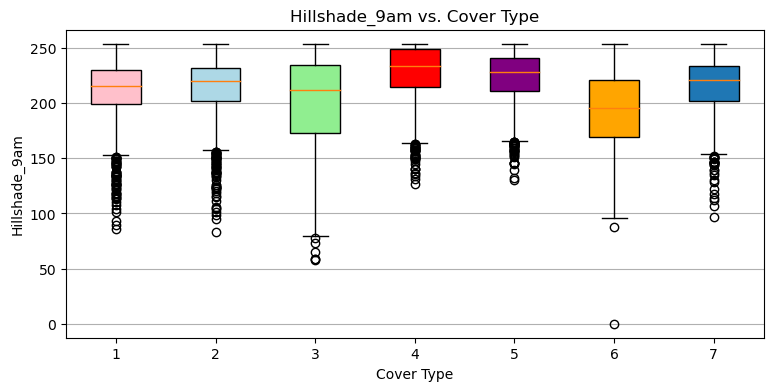

In [19]:
# Hillshade_9am vs. Cover Type

for i in range(1,8): 
    exec(f'hillshade_9am{i} = train_data[train_data.Cover_Type == i]["Hillshade_9am"]')

all_data = [globals()["hillshade_9am%d" % i] for i in range(1,8)] 
labels = [str(i) for i in range(1,8)]
fig, ax1 = plt.subplots(figsize=(9, 4))

bplot1 = ax1.boxplot(all_data,
                     vert=True, 
                     patch_artist=True,
                     labels=labels)  
ax1.set_title('Hillshade_9am vs. Cover Type')

colors = ['pink', 'lightblue', 'lightgreen', 'red', 'purple', 'orange']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

ax1.yaxis.grid(True)
ax1.set_xlabel('Cover Type')
ax1.set_ylabel('Hillshade_9am')

plt.show()    

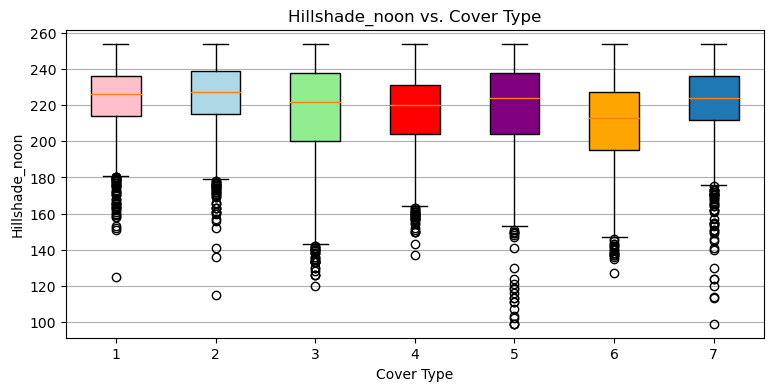

In [20]:
# Hillshade_noon vs. Cover Type

for i in range(1,8): 
    exec(f'hillshade_noon{i} = train_data[train_data.Cover_Type == i]["Hillshade_Noon"]')

all_data = [globals()["hillshade_noon%d" % i] for i in range(1,8)] 
labels = [str(i) for i in range(1,8)]
fig, ax1 = plt.subplots(figsize=(9, 4))

bplot1 = ax1.boxplot(all_data,
                     vert=True, 
                     patch_artist=True,  
                     labels=labels)  
ax1.set_title('Hillshade_noon vs. Cover Type')

colors = ['pink', 'lightblue', 'lightgreen', 'red', 'purple', 'orange']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

ax1.yaxis.grid(True)
ax1.set_xlabel('Cover Type')
ax1.set_ylabel('Hillshade_noon')

plt.show()    

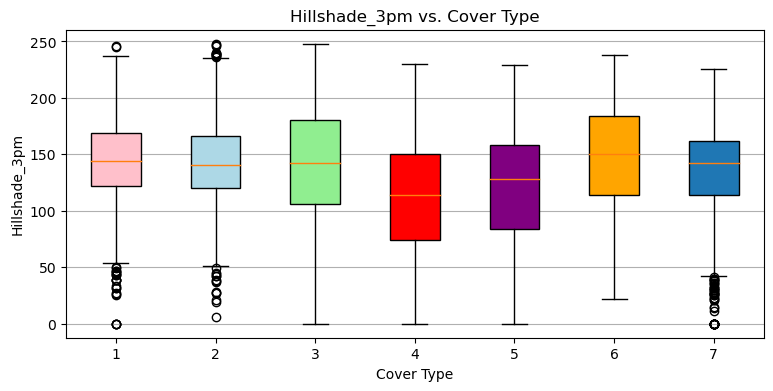

In [21]:
# Hillshade_3pm vs. Cover Type

for i in range(1,8): 
    exec(f'hillshade_3pm{i} = train_data[train_data.Cover_Type == i]["Hillshade_3pm"]')

all_data = [globals()["hillshade_3pm%d" % i] for i in range(1,8)] 
labels = [str(i) for i in range(1,8)]
fig, ax1 = plt.subplots(figsize=(9, 4))

bplot1 = ax1.boxplot(all_data,
                     vert=True, 
                     patch_artist=True, 
                     labels=labels)  
ax1.set_title('Hillshade_3pm vs. Cover Type')

colors = ['pink', 'lightblue', 'lightgreen', 'red', 'purple', 'orange']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

ax1.yaxis.grid(True)
ax1.set_xlabel('Cover Type')
ax1.set_ylabel('Hillshade_3pm')

plt.show()    

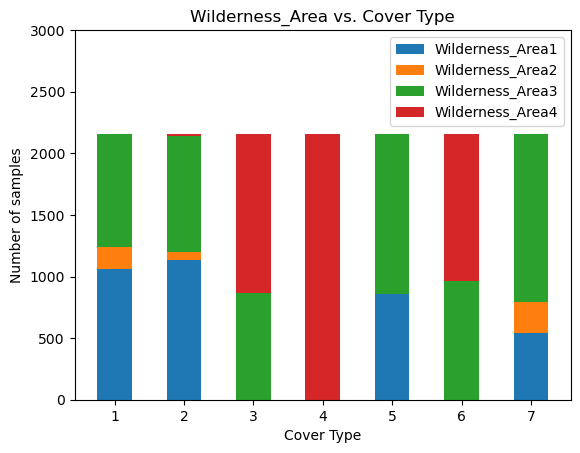

In [22]:
# Wilderness_Area vs. Cover Type 

cover_type = [str(i) for i in range(1,8)]

wilderness_area = { 
    "Wilderness_Area1": [len(train_data[(train_data["Cover_Type"] == i) & (train_data["Wilderness_Area"] == 1)]) for i in range(1,8)],  
    "Wilderness_Area2": [len(train_data[(train_data["Cover_Type"] == i) & (train_data["Wilderness_Area"] == 2)]) for i in range(1,8)],
    "Wilderness_Area3": [len(train_data[(train_data["Cover_Type"] == i) & (train_data["Wilderness_Area"] == 3)]) for i in range(1,8)],
    "Wilderness_Area4": [len(train_data[(train_data["Cover_Type"] == i) & (train_data["Wilderness_Area"] == 4)]) for i in range(1,8)],
}

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(7)   # initialize the start values in each bar as 0

for category, count in wilderness_area.items():
    p = ax.bar(cover_type, count, width, label=category, bottom=bottom)
    bottom += count   # stack the bars on top of each other

ax.set_ylim([0,3000])
ax.set_xlabel("Cover Type")
ax.set_ylabel("Number of samples")
ax.set_title("Wilderness_Area vs. Cover Type")
ax.legend(loc="upper right")

plt.show()

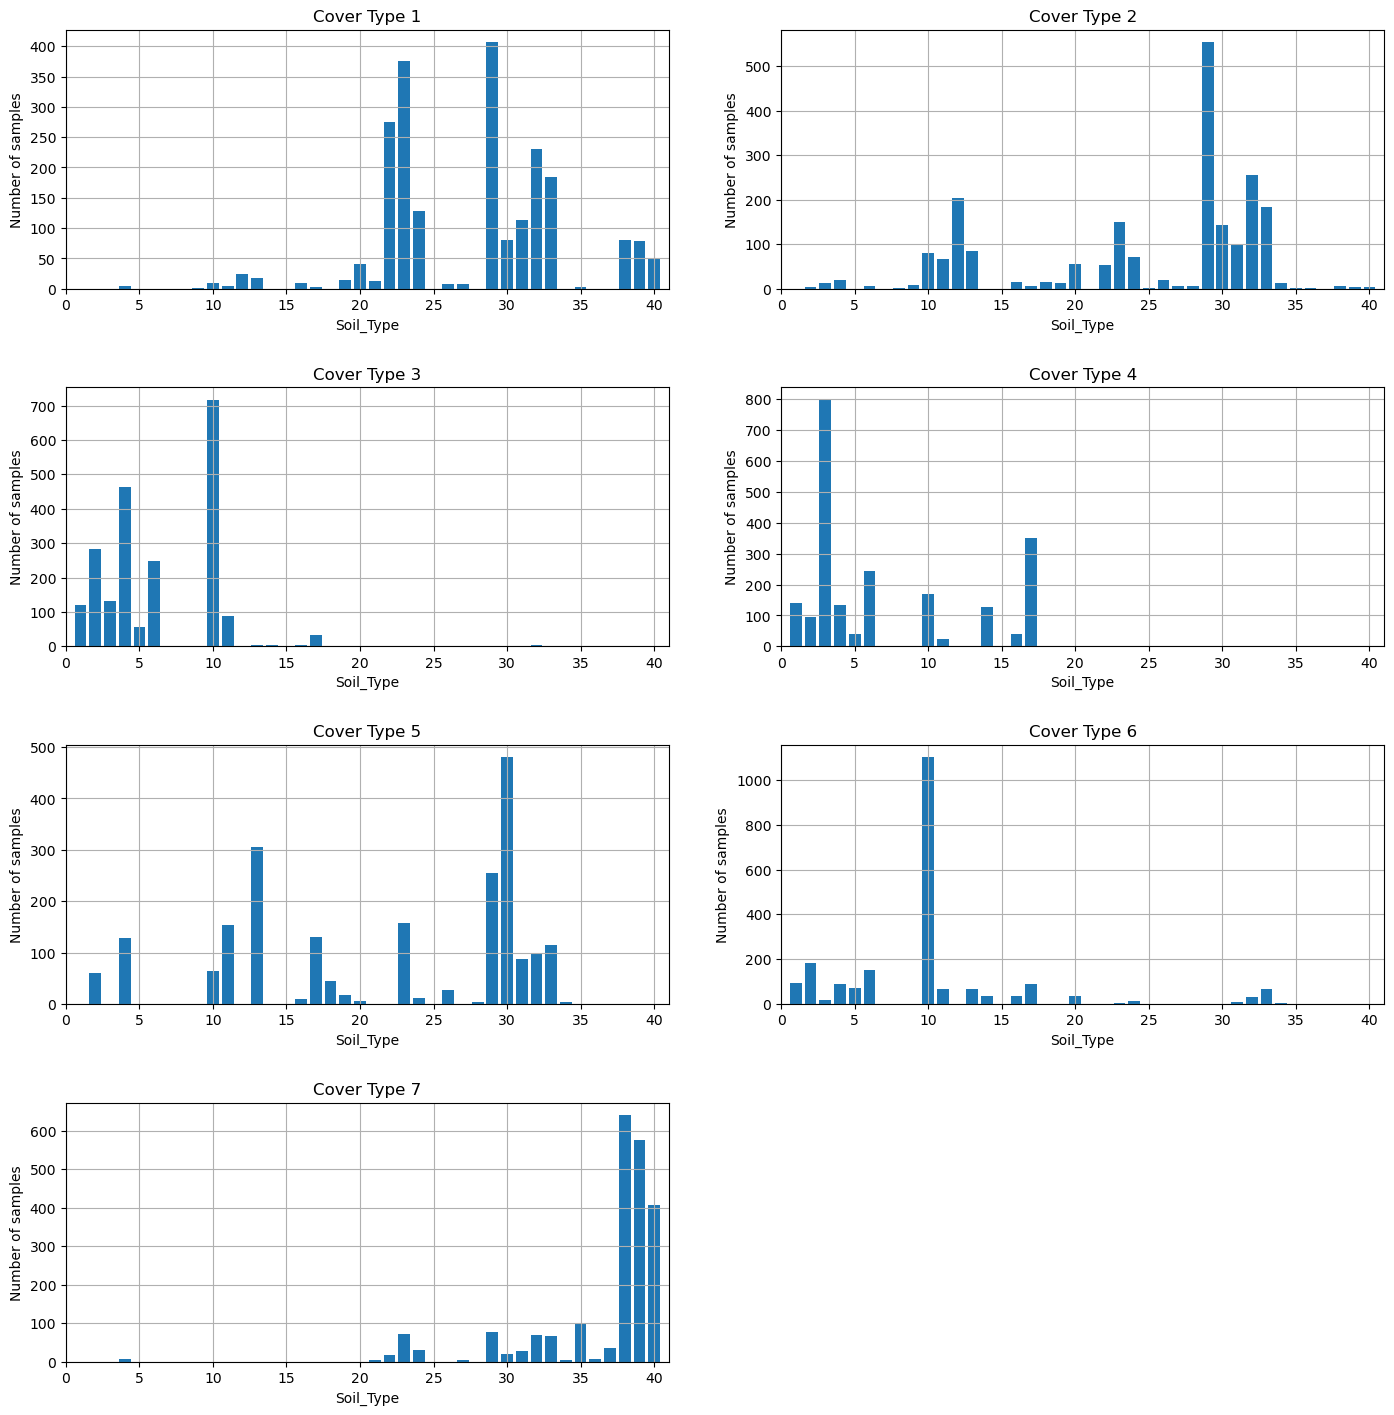

In [23]:
# Soil_Type vs. Cover Type 

# add zeros to non-existing values into the dictionary
def complete_dict(my_dict, begin_at=0, stops_at=40):    
    for key in range(begin_at, stops_at): 
        if key not in my_dict.keys():
            my_dict[key] = 0
    return my_dict

fig, ax = plt.subplots(4,2,figsize=(15,15))
fig.delaxes(ax[3][1])   # remove the extra empty subplot
fig.tight_layout(pad=5.0)   # adding space between each plot
 
for i in range(1,8):
    exec(f'cover_type{i} = Counter(train_data["Soil_Type"][train_data.Cover_Type == {i}])')
    exec(f'complete_{i} = complete_dict(cover_type{i})')
    exec(f'sorted{i} = dict(sorted(complete_{i}.items()))')
    if i % 2 != 0:   # column 0, ax[row, column]
        exec(f'ax[{(i-1)//2},{0}].bar(sorted{i}.keys(),sorted{i}.values())')
        exec(f'ax[{(i-1)//2},{0}].set_title("Cover Type {i}")')
        exec(f'ax[{(i-1)//2},{0}].set_xlabel("Soil_Type")')
        exec(f'ax[{(i-1)//2},{0}].set_ylabel("Number of samples")')
        exec(f'ax[{(i-1)//2},{0}].set_xlim(0,41)')
        exec(f'ax[{(i-1)//2},{0}].grid()')
    
    else:    # column 1
        exec(f'ax[{(i-2)//2},{1}].bar(sorted{i}.keys(),sorted{i}.values())')
        exec(f'ax[{(i-2)//2},{1}].set_title("Cover Type {i}")')
        exec(f'ax[{(i-2)//2},{1}].set_xlabel("Soil_Type")')
        exec(f'ax[{(i-2)//2},{1}].set_ylabel("Number of samples")')
        exec(f'ax[{(i-2)//2},{1}].set_xlim(0,41)')
        exec(f'ax[{(i-2)//2},{1}].grid()')

**Encoding the non-numerical attributes and accuracy** \
The categorical data Wilderness_Area and Soil_Type needs to be encoded, because they're not numerical attributes. 

In [24]:
numerical = ["Elevation", "Slope", "Horizontal_Distance_To_Roadways", 
              "Horizontal_Distance_To_Fire_Points", "Aspect", "Horizontal_Distance_To_Hydrology", 
             "Hillshade_3pm", "Hillshade_Noon", "Hillshade_9am",
            "Vertical_Distance_To_Hydrology"] 
categorical = ["Wilderness_Area", "Soil_Type"]
features = numerical + categorical

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
y = train_data["Cover_Type"]

<h3 style="text-align: center">Comparing different machine learning models</h3>

**Random Forest**

In [25]:
# grid search - finding the best hyperparameters 75.4% (best accuracy)

param_grid = [
    {'n_estimators': [80, 100], 'max_features': [2,4], 'max_depth': [10,20,30],
    'min_samples_leaf': [2, 5, 10], 'min_samples_split': [2,5,10]}   # minimum number of leaves required to split an internal node.
]

forest_reg = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=3, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_estimator_) 

{'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(max_depth=30, max_features=4, min_samples_leaf=2,
                       random_state=42)


In [26]:
forest = RandomForestClassifier(max_depth=25, max_features=4, n_estimators=100, random_state=42)
forest.fit(X,y)  
forest_predict = forest.predict(X)
forest_test = forest.predict(X_test)

In [27]:
# checking the accuracy on the training set of the random forest model
counter = 0
for i in range(len(train_data)):
    if train_data["Cover_Type"][i] == forest_predict[i]:
        counter += 1

accuracy = counter / len(train_data)
print("The prediction is %.6f%% accurate on the training set." % (accuracy*100))

# We only want two columns in the submission.csv file
output = pd.DataFrame({'Id': test_data.Id, 'Cover_Type': forest_test})  

output.to_csv('submission_randomforest.csv', index=False) 
print("Your submission was successfully saved!")

The prediction is 100.000000% accurate on the training set.
Your submission was successfully saved!


In [28]:
# From the random forest model, we can see which features are the most relevant

for name, score in zip(features, forest.feature_importances_):
    print(name, score)   

Elevation 0.26642032475358984
Slope 0.029205360198139636
Horizontal_Distance_To_Roadways 0.09813312963600318
Horizontal_Distance_To_Fire_Points 0.07915346609737453
Aspect 0.04768562881212671
Horizontal_Distance_To_Hydrology 0.06294168976399012
Hillshade_3pm 0.040000766722270605
Hillshade_Noon 0.040972940194982856
Hillshade_9am 0.058354918092680695
Vertical_Distance_To_Hydrology 0.05037904539612309
Wilderness_Area 0.06407682250220675
Soil_Type 0.16267590783051197


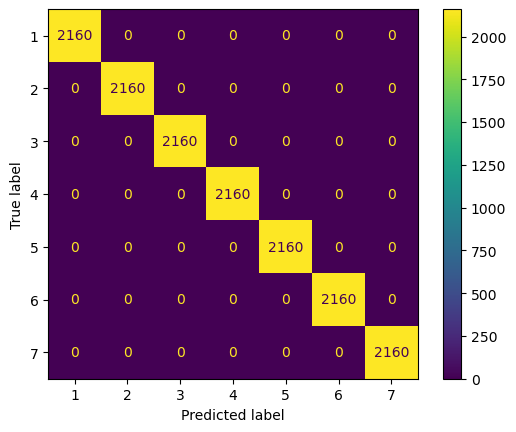

In [32]:
true_values = train_data["Cover_Type"].to_numpy()
cm = confusion_matrix(forest_predict, true_values)
cmd = ConfusionMatrixDisplay(cm, display_labels=[str(i) for i in range(1,8)])
cmd.plot()

**Bagging**

In [33]:
# grid search  52.5%
param_grid = {'n_estimators': [80,90,100],
              'max_samples': [50,100,150],
              'max_features': [2,4,5]}   

bagging = BaggingClassifier(random_state=42)
grid_search = GridSearchCV(bagging, param_grid, cv=3, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_estimator_) 

{'max_features': 5, 'max_samples': 150, 'n_estimators': 100}
BaggingClassifier(max_features=5, max_samples=150, n_estimators=100,
                  random_state=42)


In [34]:
bagging = BaggingClassifier(
         DecisionTreeClassifier(max_features=4, min_samples_leaf=2,
                      min_samples_split=4, random_state=42), max_features=4, n_estimators=100, max_samples=150, bootstrap=True, n_jobs=-1)  # use all available cores
bagging.fit(X,y)
bagging_predict = bagging.predict(X)
bagging_test = bagging.predict(X_test)

counter = 0
for i in range(len(train_data)):
    if train_data["Cover_Type"][i] == bagging_predict[i]:
        counter += 1
accuracy = counter / len(train_data)
print("The prediction is %.6f%% accurate on the training set." % (accuracy*100))

output = pd.DataFrame({'Id': test_data.Id, 'Cover_Type': bagging_test})  

output.to_csv('submission_bagging.csv', index=False) 
print("Your submission was successfully saved!")

The prediction is 71.547619% accurate on the training set.
Your submission was successfully saved!


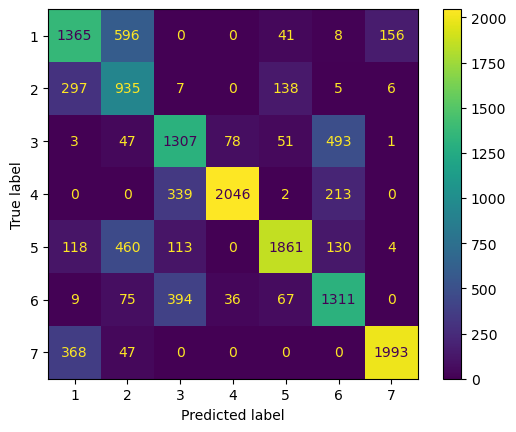

In [35]:
true_values = train_data["Cover_Type"].to_numpy()
cm = confusion_matrix(bagging_predict, true_values)
cmd = ConfusionMatrixDisplay(cm, display_labels=[str(i) for i in range(1,8)])
cmd.plot()

**Decision Tree**

In [37]:
# grid search 65.6%

param_grid = [
    {'max_features': [2,4], 'max_depth': [8,10,12,14,20],
    'min_samples_leaf': [2,5,10], 'min_samples_split': [2,5,10],
     'criterion': ['gini', 'entropy', 'log_loss']}  
]
tree = DecisionTreeClassifier()
grid_search = GridSearchCV(tree, param_grid, cv=3, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_estimator_) 

{'criterion': 'gini', 'max_depth': 12, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=12, max_features=4, min_samples_leaf=2)


In [38]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=4,
                       min_samples_leaf=2, min_samples_split=5,
                       random_state=42)
tree.fit(X,y)
tree_predict = tree.predict(X)
tree_test = tree.predict(X_test)

counter = 0
for i in range(len(train_data)):
    if train_data["Cover_Type"][i] == tree_predict[i]:
        counter += 1
accuracy = counter / len(train_data)
print("The prediction is %.6f%% accurate on the training set." % (accuracy*100))

output = pd.DataFrame({'Id': test_data.Id, 'Cover_Type': tree_test})  

output.to_csv('submission_decisiontree.csv', index=False) 
print("Your submission was successfully saved!")

The prediction is 94.801587% accurate on the training set.
Your submission was successfully saved!


In [ ]:
true_values = train_data["Cover_Type"].to_numpy()
cm = confusion_matrix(tree_predict, true_values)
cmd = ConfusionMatrixDisplay(cm, display_labels=[str(i) for i in range(1,8)])
cmd.plot()

**K-Nearest Neighbors**

In [40]:
# grid search k-nearest neighbors   69.3%
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [3,5,7],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}   

knearestneighbors = KNeighborsClassifier()
grid_search = GridSearchCV(knearestneighbors, param_grid, cv=3, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_estimator_) 

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')


In [41]:
knearest = KNeighborsClassifier(algorithm='brute', n_neighbors=3, p=1, weights='distance')
knearest.fit(X,y)
knearest_predict = knearest.predict(X)
knearest_test = knearest.predict(X_test)

counter = 0
for i in range(len(train_data)):
    if train_data["Cover_Type"][i] == knearest_predict[i]:
        counter += 1
accuracy = counter / len(train_data)
print("The prediction is %.6f%% accurate on the training set." % (accuracy*100))

output = pd.DataFrame({'Id': test_data.Id, 'Cover_Type': knearest_test})  
output.to_csv('submission_kneighbors.csv', index=False) 
print("Your submission was successfully saved!")

The prediction is 100.000000% accurate on the training set.
Your submission was successfully saved!


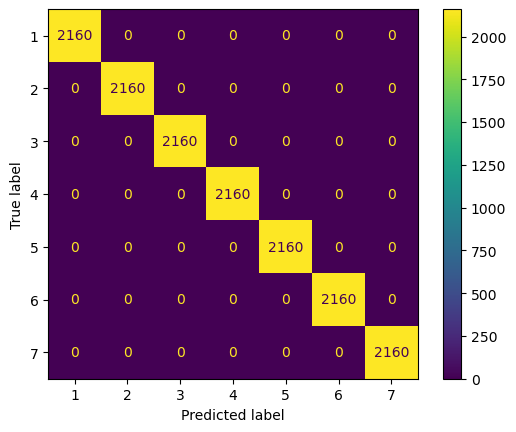

In [43]:
true_values = train_data["Cover_Type"].to_numpy()
cm = confusion_matrix(knearest_predict, true_values)
cmd = ConfusionMatrixDisplay(cm, display_labels=[str(i) for i in range(1,8)])
cmd.plot()

**Voting Classifier** 

In [44]:
# 73.3%, slightly worse than random forest
# combining all models together: random forest, decision tree, bagging, k-nearest neighbors

voting = VotingClassifier(
         estimators=[("rf", forest), ("kneighbors", knearest), ("dt", tree), ("bagging", bagging)],
         voting="hard", n_jobs=-1)   # hard voting - majority vote
voting.fit(X,y)

for model in (tree, forest, knearest, bagging, voting):
    model.fit(X,y)
    pred = model.predict(X)
    prediction2 = model.predict(X_test) 
    # accuracy on the training set: y -> actual value, pred -> prediction made on the training set
    print(model.__class__.__name__, accuracy_score(y, pred)) 

output = pd.DataFrame({'Id': test_data.Id, 'Cover_Type': prediction2})  
output.to_csv('submission_voting.csv', index=False) 
print("Your submission was successfully saved!")

DecisionTreeClassifier 0.948015873015873
RandomForestClassifier 1.0
KNeighborsClassifier 1.0
BaggingClassifier 0.7234126984126984
VotingClassifier 0.9879629629629629
Your submission was successfully saved!


In [45]:
voting = VotingClassifier(
         estimators=[("rf", forest), ("kneighbors", knearest), ("dt", tree), ("bagging", bagging)],
         voting="hard", n_jobs=-1)   # hard voting - majority vote
model.fit(X,y)
predictions_train = model.predict(X)
true_values = train_data["Cover_Type"].to_numpy()

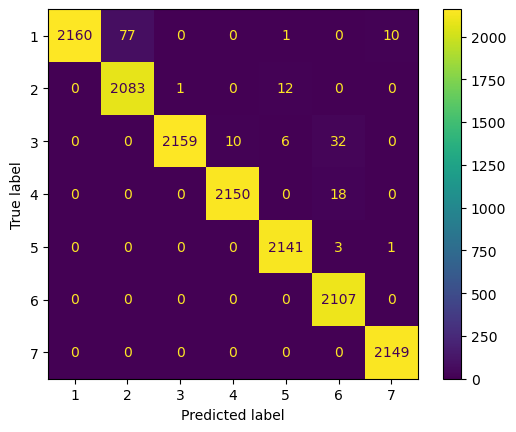

In [46]:
cm = confusion_matrix(predictions_train, true_values)
cmd = ConfusionMatrixDisplay(cm, display_labels=[str(i) for i in range(1,8)])
cmd.plot()

**Stacking Classifier**

In [51]:
# 76.886% accuracy (highest accuracy)
estimators = [("forest", forest), ("bagging", bagging), ("knearest", knearest), ("tree", tree)]
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression(max_iter=10000))

clf.fit(X,y)
stacking_predict = clf.predict(X)
stacking_test = clf.predict(X_test)

for model in (tree, forest, knearest, bagging, clf):
    model.fit(X,y)
    prediction_train = model.predict(X)
    prediction_test = model.predict(X_test) 
    print(model.__class__.__name__, accuracy_score(y, prediction_train))
    
output = pd.DataFrame({'Id': test_data.Id, 'Cover_Type': stacking_test})  
output.to_csv('submission_stacking.csv', index=False) 
print("Your submission was successfully saved!")

DecisionTreeClassifier 0.948015873015873
RandomForestClassifier 1.0
KNeighborsClassifier 1.0
BaggingClassifier 0.7234126984126984
StackingClassifier 0.9999338624338624
Your submission was successfully saved!


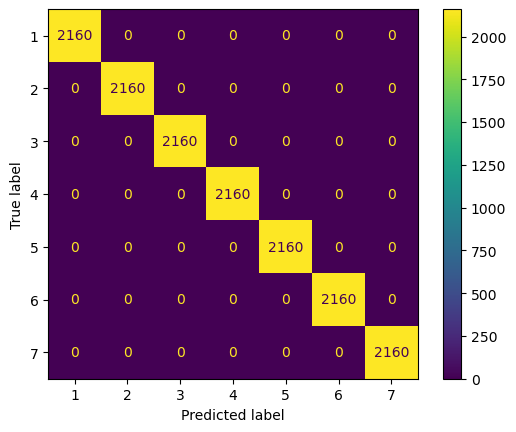

In [52]:
cm = confusion_matrix(stacking_predict, true_values)
cmd = ConfusionMatrixDisplay(cm, display_labels=[str(i) for i in range(1,8)])
cmd.plot()